<a href="https://colab.research.google.com/github/amythemirror/Springboard-Capstone-Two/blob/master/Data%20Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
#load data to a dataframe
df = pd.read_csv('/content/drive/My Drive/Springboard/Capstone 2/OnlineRetail.csv', parse_dates=['InvoiceDate'], encoding = 'cp1252')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [0]:
#convert the Customer ID data type from float to string
df['CustomerID'] = df['CustomerID'].astype('object')

In [8]:
#stats for numeric columns
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [9]:
#number of unique values for each column
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [10]:
#frequency counts for categorical columns
df['InvoiceNo'].value_counts(dropna=False)

573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
572996       1
543385       1
544805       1
564431       1
550930       1
Name: InvoiceNo, Length: 25900, dtype: int64

In [11]:
df['StockCode'].value_counts(dropna=False)

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
90127A       1
72803b       1
35824B       1
72803B       1
84864A       1
Name: StockCode, Length: 4070, dtype: int64

In [12]:
df['CustomerID'].value_counts(dropna=False)

NaN        135080
17841.0      7983
14911.0      5903
14096.0      5128
12748.0      4642
            ...  
13135.0         1
12943.0         1
15313.0         1
17956.0         1
13747.0         1
Name: CustomerID, Length: 4373, dtype: int64

In [13]:
df['Country'].value_counts(dropna=False)

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [14]:
#check for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [15]:
#drop all rows with missing Customer ID
df = df[df['CustomerID'].notna()]
df.shape

(406829, 8)

In [16]:
#check for missing values again
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [0]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [18]:
df.describe()

,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [19]:
#remove rows with unit price equals to zero
#keep only purchases and returns
df = df[df.UnitPrice > 0]
df.shape

(401564, 8)

In [0]:
#remove the Description column as it's not needed for the analysis
df.drop(columns='Description', inplace=True)

Quantity        AxesSubplot(0.125,0.125;0.352273x0.755)
UnitPrice    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

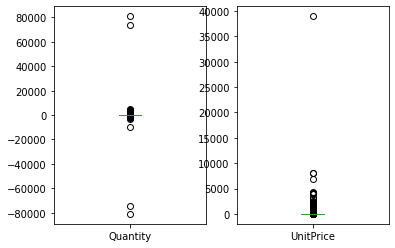

In [21]:
#check for outliers
df.plot(kind='box', y=['Quantity', 'UnitPrice'], subplots=True)

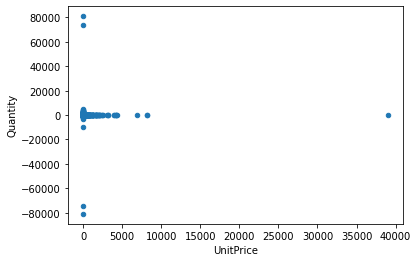

In [22]:
df.plot(kind='scatter', x='UnitPrice', y='Quantity')

In [23]:
#remove outliers using IQR
outlier_col= ['Quantity', 'UnitPrice']
outlier_df = df[outlier_col]
Q1 = outlier_df.quantile(0.25)
Q3 = outlier_df.quantile(0.75)
IQR = Q3 - Q1

idx = ~((outlier_df < (Q1 - 1.5 * IQR)) | (outlier_df > (Q3 + 1.5 * IQR))).any(axis=1)

df_cleaned = df[idx]

df_cleaned.shape

(339422, 7)

In [24]:
#percentage of removed entries
removed = len(df.index) - len(df_cleaned.index)
print('Percentage of rows removed is {}%'.format(round(removed/len(df.index)*100, 2)))

Percentage of rows removed is 15.47%


In [0]:
#save the data
df_cleaned.to_csv('/content/drive/My Drive/Springboard/Capstone 2/OnlineRetail_cleaned.csv')